#### Pooja Ganesh (pganesh4) 
#### Srushti Manjunath (srushti5)

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Dataset has 45 features and target variable - A_delay, which represents delay in aircraft of that sample.

### Importing the Dataset

In [28]:
df_temp = pd.read_csv("Final.csv") 
extracted_col = df_temp["Date"]

In [29]:
df = pd.read_csv("fit.csv") 
df=df.join(extracted_col)

In [30]:
df.columns

Index(['D_Airport Rating', 'D_Airport On Time Rating',
       'D_Airport Service Rating', 'A_Airport Rating',
       'A_Airport On Time Rating', 'A_Airport Service Rating', 'D_Delay',
       'Duration', 'A_Delay', 'C_Rating', 'C_Market Share', 'C_Load Factor',
       'C_On Time Performance Rating', 'D_DewPointC', 'D_WindGustKmph',
       'D_cloudcover', 'D_humidity', 'D_precipMM', 'D_pressure', 'D_tempC',
       'D_visibility', 'D_winddirDegree', 'D_windspeedKmph', 'D_Time',
       'A_DewPointC', 'A_WindGustKmph', 'A_cloudcover', 'A_humidity',
       'A_precipMM', 'A_pressure', 'A_tempC', 'A_visibility',
       'A_winddirDegree', 'A_windspeedKmph', 'A_Time', 'BLR-BOM', 'BLR-DEL',
       'BOM-DEL', 'CCU-DEL', 'DEL-HYD', 'Air Asia', 'Air India', 'Go Air',
       'Indigo', 'Spicejet', 'Vistara', 'Date'],
      dtype='object')

In [31]:
dates = df['Date'].tolist()
dates

['15-04-2019',
 '16-04-2019',
 '17-04-2019',
 '18-04-2019',
 '19-04-2019',
 '20-04-2019',
 '21-04-2019',
 '22-04-2019',
 '23-04-2019',
 '24-04-2019',
 '25-04-2019',
 '26-04-2019',
 '27-04-2019',
 '28-04-2019',
 '29-04-2019',
 '30-04-2019',
 '01-05-2019',
 '02-05-2019',
 '03-05-2019',
 '04-05-2019',
 '05-05-2019',
 '06-05-2019',
 '07-05-2019',
 '08-05-2019',
 '09-05-2019',
 '10-05-2019',
 '11-05-2019',
 '12-05-2019',
 '13-05-2019',
 '14-05-2019',
 '15-05-2019',
 '16-05-2019',
 '17-05-2019',
 '18-05-2019',
 '19-05-2019',
 '20-05-2019',
 '21-05-2019',
 '22-05-2019',
 '23-05-2019',
 '24-05-2019',
 '25-05-2019',
 '26-05-2019',
 '27-05-2019',
 '28-05-2019',
 '29-05-2019',
 '30-05-2019',
 '31-05-2019',
 '02-06-2019',
 '03-06-2019',
 '04-06-2019',
 '05-06-2019',
 '06-06-2019',
 '07-06-2019',
 '08-06-2019',
 '09-06-2019',
 '10-06-2019',
 '11-06-2019',
 '12-06-2019',
 '13-06-2019',
 '14-06-2019',
 '15-06-2019',
 '16-06-2019',
 '17-06-2019',
 '18-06-2019',
 '19-06-2019',
 '20-06-2019',
 '21-06-20

### Drop unnecessary columns in Indigo Data later 

## Viewing only Indigo flights

In [32]:
df_indigo=df[df['Indigo'] == 1]

df_indigo

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara,Date
8002,7.50,8.6,9.2,7.29,6.2,9.0,5.0,81.0,-19.0,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,28-01-2018
8003,7.50,8.6,9.2,7.29,6.2,9.0,3.0,83.0,-19.0,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29-01-2018
8004,7.50,8.6,9.2,7.29,6.2,9.0,7.0,75.0,-22.0,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30-01-2018
8005,7.50,8.6,9.2,7.29,6.2,9.0,-4.0,76.0,-33.0,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31-01-2018
8006,7.50,8.6,9.2,7.29,6.2,9.0,2.0,81.0,-22.0,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,01-02-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,7.99,7.3,9.1,8.27,7.8,9.0,18.0,101.0,-11.0,7.9,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23-01-2020
10296,7.99,7.3,9.1,8.27,7.8,9.0,19.0,101.0,-9.0,7.9,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,24-01-2020
10297,7.99,7.3,9.1,8.27,7.8,9.0,11.0,102.0,-18.0,7.9,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,25-01-2020
10298,7.99,7.3,9.1,8.27,7.8,9.0,61.0,118.0,49.0,7.9,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,26-01-2020


In [33]:
df_indigo[["day", "month", "year"]] = df_indigo["Date"].str.split("-", expand = True)

C:\Users\Pooja\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [34]:
#df_indigo=df_indigo.drop(['Date'], axis=1)
#df_indigo

In [35]:
df_indigo['year'] = df_indigo['year'].astype(int)
df_indigo['day'] = df_indigo['day'].astype(int)
df_indigo['month'] = df_indigo['month'].astype(int)

df_indigo

<ipython-input-35-f9a899c1841b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indigo['year'] = df_indigo['year'].astype(int)
<ipython-input-35-f9a899c1841b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indigo['day'] = df_indigo['day'].astype(int)
<ipython-input-35-f9a899c1841b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara,Date,day,month,year
8002,7.50,8.6,9.2,7.29,6.2,9.0,5.0,81.0,-19.0,7.9,...,0.0,0.0,0.0,1.0,0.0,0.0,28-01-2018,28,1,2018
8003,7.50,8.6,9.2,7.29,6.2,9.0,3.0,83.0,-19.0,7.9,...,0.0,0.0,0.0,1.0,0.0,0.0,29-01-2018,29,1,2018
8004,7.50,8.6,9.2,7.29,6.2,9.0,7.0,75.0,-22.0,7.9,...,0.0,0.0,0.0,1.0,0.0,0.0,30-01-2018,30,1,2018
8005,7.50,8.6,9.2,7.29,6.2,9.0,-4.0,76.0,-33.0,7.9,...,0.0,0.0,0.0,1.0,0.0,0.0,31-01-2018,31,1,2018
8006,7.50,8.6,9.2,7.29,6.2,9.0,2.0,81.0,-22.0,7.9,...,0.0,0.0,0.0,1.0,0.0,0.0,01-02-2018,1,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,7.99,7.3,9.1,8.27,7.8,9.0,18.0,101.0,-11.0,7.9,...,0.0,0.0,0.0,1.0,0.0,0.0,23-01-2020,23,1,2020
10296,7.99,7.3,9.1,8.27,7.8,9.0,19.0,101.0,-9.0,7.9,...,0.0,0.0,0.0,1.0,0.0,0.0,24-01-2020,24,1,2020
10297,7.99,7.3,9.1,8.27,7.8,9.0,11.0,102.0,-18.0,7.9,...,0.0,0.0,0.0,1.0,0.0,0.0,25-01-2020,25,1,2020
10298,7.99,7.3,9.1,8.27,7.8,9.0,61.0,118.0,49.0,7.9,...,0.0,0.0,0.0,1.0,0.0,0.0,26-01-2020,26,1,2020


## Indigo Data for Only 2019

In [36]:
df_indigo=df_indigo.drop(['Air Asia','Air India','Go Air','Indigo','Spicejet','Vistara','Date','year'], axis=1)


In [37]:
df_pol = pd.read_csv("pol.csv") 
df_sub = pd.read_csv("sub.csv") 

In [38]:
df_sub.head()

,month,day,subjectivity
0,1,1,0.437500
1,1,2,0.000000
2,1,3,0.530952
3,1,4,0.346154
4,1,5,0.000000


In [39]:
df_combined = pd.merge(df_indigo, df_pol, on=['month','day'])

In [40]:
df_combined.head()

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,A_windspeedKmph,A_Time,BLR-BOM,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,day,month,polarity
0,7.50,8.6,9.2,7.29,6.2,9.0,5.0,81.0,-19.0,7.9,...,6.0,6.0,1.0,0.0,0.0,0.0,0.0,28,1,-0.032143
1,7.50,8.6,9.2,7.29,6.2,9.0,-2.0,84.0,-33.0,7.9,...,18.0,6.0,1.0,0.0,0.0,0.0,0.0,28,1,-0.032143
2,7.00,8.5,8.7,7.99,7.3,9.1,-3.0,125.0,-28.0,7.9,...,6.0,8.0,0.0,0.0,0.0,1.0,0.0,28,1,-0.032143
3,7.00,8.5,8.7,7.99,7.3,9.1,18.0,119.0,-12.0,7.9,...,12.0,8.0,0.0,0.0,0.0,1.0,0.0,28,1,-0.032143
4,7.99,7.3,9.1,8.27,7.8,9.0,26.0,108.0,4.0,7.9,...,9.0,7.0,0.0,0.0,0.0,0.0,1.0,28,1,-0.032143


In [41]:
df_combined= pd.merge(df_combined, df_sub, on=['month','day'])

In [42]:
df_final = pd.read_csv("volumefinal.csv") 

In [43]:
df_final=df_final.drop(['date','polarity','subjectivity'], axis=1)

In [44]:
df_final.head()

,month,day,tweet_volume
0,12,28,1
1,12,27,1
2,12,24,2
3,12,24,2
4,12,21,2


In [45]:
df_combined= pd.merge(df_combined, df_final, on=['month','day'])

In [46]:
df_combined.columns

Index(['D_Airport Rating', 'D_Airport On Time Rating',
       'D_Airport Service Rating', 'A_Airport Rating',
       'A_Airport On Time Rating', 'A_Airport Service Rating', 'D_Delay',
       'Duration', 'A_Delay', 'C_Rating', 'C_Market Share', 'C_Load Factor',
       'C_On Time Performance Rating', 'D_DewPointC', 'D_WindGustKmph',
       'D_cloudcover', 'D_humidity', 'D_precipMM', 'D_pressure', 'D_tempC',
       'D_visibility', 'D_winddirDegree', 'D_windspeedKmph', 'D_Time',
       'A_DewPointC', 'A_WindGustKmph', 'A_cloudcover', 'A_humidity',
       'A_precipMM', 'A_pressure', 'A_tempC', 'A_visibility',
       'A_winddirDegree', 'A_windspeedKmph', 'A_Time', 'BLR-BOM', 'BLR-DEL',
       'BOM-DEL', 'CCU-DEL', 'DEL-HYD', 'day', 'month', 'polarity',
       'subjectivity', 'tweet_volume'],
      dtype='object')

In [47]:
df_new_fit = df_combined.drop(['BLR-BOM', 'BLR-DEL',
       'BOM-DEL', 'CCU-DEL', 'DEL-HYD'], axis=1)

In [67]:
df_new_fit
df_new_fit.to_csv('fit_data_twitter',index=False)

In [64]:
##############################
#For months between 3-6
df_months = df_new_fit[df_new_fit['month'] ==6]
#df_months = df_months[df_new_fit['month'] <7]

##############################

#########################################################################################################
# Correlation between tweet data and delay data on a daily basis
#########################################################################################################

In [65]:
################################################################################################
# Delay Data Analysis - (conclusion A_dleay mimics closely with sub)
################################################################################################
#delay=df_new_fit.A_Delay.values.tolist()
#print(min(delay))
#print(max(delay))

#Neg : Delayed by 54 mins
#Pos : Reached early by 311 mins


df_del=df_months[df_months['A_Delay'] < -10] # delayed by 20 mins
#len(df_new_fit_pol['subjectivity'])
df_del=df_del.groupby(['day'], as_index=False)['A_Delay'].count()
df_del

,day,A_Delay
0,2,8
1,6,4
2,8,5
3,11,12
4,12,12
5,16,6
6,17,6
7,18,6
8,22,5
9,28,5


<class 'list'>
<class 'list'>


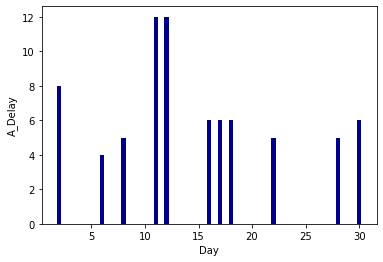

In [66]:
X = df_del.A_Delay.values.tolist()
M = df_del.day.values.tolist()

plt.bar(M, X, color='DarkBlue',width = 0.4)
plt.ylabel('A_Delay')
plt.xlabel('Day')
#plt.xlim([-50, 50])
print(type(X))                   
print(type(M)) 
#print(max(df_new_fit['tweet_volume']))

In [ ]:
##############################################################################################
# Twitter Data Analysis to understand correlation between monthly tweet volume and Subjectivity

##############################################################################################

In [126]:
df_new_fit_sub=df_new_fit[df_new_fit['subjectivity'] > 0.4]
#len(df_new_fit_pol['subjectivity'])
df_new_fit_sub=df_new_fit_sub.groupby(['month'], as_index=False)['tweet_volume'].sum()
df_new_fit_sub

,month,tweet_volume
0,1,31
1,2,50
2,3,15
3,4,15
4,5,15
5,6,30
6,7,44
7,8,6
8,9,29
9,10,56


<class 'list'>
<class 'list'>


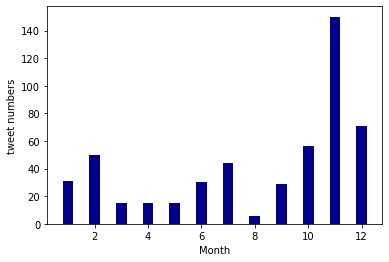

In [127]:
X = df_new_fit_sub.tweet_volume.values.tolist()
M = df_new_fit_sub.month.values.tolist()

plt.bar(M, X, color='DarkBlue',width = 0.4)
plt.ylabel('tweet numbers')
plt.xlabel('Month')
#plt.xlim([-50, 50])
print(type(X))                   
print(type(M)) 
#print(max(df_new_fit['tweet_volume']))


In [ ]:
###############################################################################################
#Twitter Data Analysis to understand correlation between monthly tweet volume and Polarity
###############################################################################################

In [116]:
df_new_fit_pol=df_new_fit[df_new_fit['polarity'] < 0]
len(df_new_fit_pol['polarity'])
df_new_fit_pol=df_new_fit_pol.groupby(['month'], as_index=False)['tweet_volume'].sum()
df_new_fit_pol

,month,tweet_volume
0,1,81
1,2,61
2,3,9
3,4,21
4,5,39
5,6,66
6,7,122
7,8,15
8,9,32
9,10,71


<class 'list'>
<class 'list'>


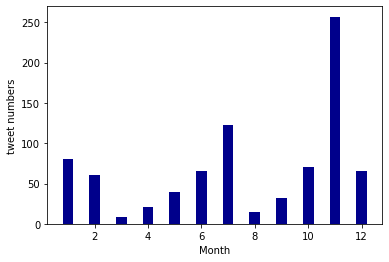

In [117]:
###################################################
#df_new_fit=df_new_fit_vol[df_new_fit_vol['polarity'] <= 0]
#df_new_fit['tweet_volume'] = df_new_fit['tweet_volume'].astype(float)
#df_new_fit['month'] = df_new_fit['month'].astype(float)

X = df_new_fit_pol.tweet_volume.values.tolist()
M = df_new_fit_pol.month.values.tolist()

plt.bar(M, X, color='DarkBlue',width = 0.4)
plt.ylabel('tweet numbers')
plt.xlabel('Month')
#plt.xlim([-50, 50])
print(type(X))                   
print(type(M)) 
#print(max(df_new_fit['tweet_volume']))


In [77]:
###################################################
df_new_fit_vol=df_new_fit.groupby(['month'], as_index=False)['tweet_volume'].sum()
df_new_fit_vol

,month,tweet_volume
0,1.0,116.0
1,2.0,121.0
2,3.0,42.0
3,4.0,27.0
4,5.0,78.0
5,6.0,87.0
6,7.0,128.0
7,8.0,65.0
8,9.0,61.0
9,10.0,151.0


<class 'list'>
<class 'list'>


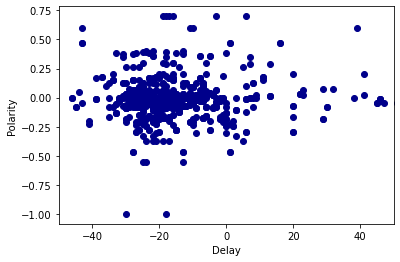

In [67]:
df_new_fit['A_Delay'] = df_new_fit['A_Delay'].astype(float)
df_new_fit['polarity'] = df_new_fit['polarity'].astype(float)

X = df_new_fit.A_Delay.values.tolist()
Y = df_new_fit.polarity.values.tolist()

plt.scatter(x= X, y=Y, c='DarkBlue')
plt.xlabel('Delay')
plt.ylabel('Polarity')
plt.xlim([-50, 50])
print(type(X))                   
print(type(Y))                     

<class 'list'>
<class 'list'>


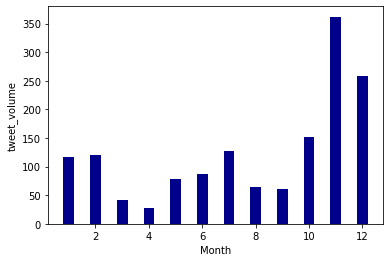

In [83]:
#df_new_fit['tweet_volume'] = df_new_fit['tweet_volume'].astype(float)
#df_new_fit['month'] = df_new_fit['month'].astype(float)

X = df_new_fit_vol.tweet_volume.values.tolist()
M = df_new_fit_vol.month.values.tolist()

plt.bar(M, X, color='DarkBlue',width = 0.4)
plt.ylabel('tweet_volume')
plt.xlabel('Month')
#plt.xlim([-50, 50])
print(type(X))                   
print(type(M)) 
#print(max(df_new_fit['tweet_volume']))

In [ ]:
df_new_fit['A_Delay'] = df_new_fit['A_Delay'].astype(float)
df_new_fit['subjectivity'] = df_new_fit['subjectivity'].astype(float)

X = df_new_fit.A_Delay.values.tolist()
Z = df_new_fit.subjectivity.values.tolist()

plt.scatter(x= X, y=Z, c='DarkBlue')
plt.xlabel('Delay')
plt.ylabel('Subjectivity')
plt.xlim([-50, 50])
print(type(X))                   
print(type(Z))                     

In [31]:
dates = df_indigo['A_Delay'].tolist()

[-1.0,
 -26.0,
 -18.0,
 -33.0,
 64.0,
 103.0,
 -25.0,
 -33.0,
 54.0,
 47.0,
 -27.0,
 -35.0,
 -31.0,
 -16.0,
 -30.0,
 -25.0,
 -33.0,
 3.0,
 -25.0,
 -24.0,
 115.0,
 -9.0,
 -26.0,
 -27.0,
 -28.0,
 -21.0,
 -33.0,
 -27.0,
 -34.0,
 17.0,
 -35.0,
 -17.0,
 -21.0,
 -30.0,
 -32.0,
 -11.0,
 -21.0,
 -11.0,
 -25.0,
 -20.0,
 -28.0,
 -27.0,
 -19.0,
 -41.0,
 -36.0,
 -30.0,
 -20.0,
 -36.0,
 -26.0,
 -22.0,
 -15.0,
 -12.0,
 -24.0,
 -31.0,
 -37.0,
 -23.0,
 -33.0,
 -19.0,
 -33.0,
 -15.0,
 -35.0,
 -21.0,
 -30.0,
 -41.0,
 -19.0,
 -14.0,
 -33.0,
 -34.0,
 -28.0,
 -43.0,
 -35.0,
 -33.0,
 -37.0,
 -21.0,
 -43.0,
 -37.0,
 -21.0,
 -41.0,
 -26.0,
 -34.0,
 -44.0,
 -37.0,
 -28.0,
 -26.0,
 -29.0,
 -13.0,
 -20.0,
 -28.0,
 -29.0,
 -24.0,
 -32.0,
 -22.0,
 -18.0,
 -15.0,
 -31.0,
 -28.0,
 -14.0,
 -19.0,
 -19.0,
 -29.0,
 -24.0,
 -22.0,
 -22.0,
 -19.0,
 -21.0,
 -24.0,
 -35.0,
 -27.0,
 -26.0,
 -30.0,
 -25.0,
 -25.0,
 -24.0,
 -18.0,
 -35.0,
 -32.0,
 -25.0,
 -24.0,
 -25.0,
 -17.0,
 -23.0,
 -30.0,
 -30.0,
 -22.0,
 -32.0,
 -24.0,


## Feature Engineering and Machine Learniing

In [8]:
'''
# One Hot Encoding for cataegorical features like route
from sklearn.preprocessing import LabelEncoder

data = df['route']
values= np.array(data)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

df1 = pd.DataFrame.from_records(onehot_encoded)
df = pd.concat((df,df1),axis=1)
'''

In [21]:
'''
# One Hot Encoding for cataegorical features like carrier
from sklearn.preprocessing import LabelEncoder

data1 = df['Carrier']
values1= np.array(data1)

label_encoder1 = LabelEncoder()
integer_encoded1 = label_encoder.fit_transform(values1)

from sklearn.preprocessing import OneHotEncoder

onehot_encoder1 = OneHotEncoder(sparse=False)
integer_encoded1 = integer_encoded1.reshape(len(integer_encoded1), 1)
onehot_encoded1 = onehot_encoder1.fit_transform(integer_encoded1)

df2 = pd.DataFrame.from_records(onehot_encoded1)
df = pd.concat((df,df2),axis=1)
'''

In [22]:
import pandas as pd
data = pd.read_csv("fit.csv")

In [23]:
data

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,C_Market Share,C_Load Factor,C_On Time Performance Rating,D_DewPointC,D_WindGustKmph,D_cloudcover,D_humidity,D_precipMM,D_pressure,D_tempC,D_visibility,D_winddirDegree,D_windspeedKmph,D_Time,A_DewPointC,A_WindGustKmph,A_cloudcover,A_humidity,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,BLR-BOM,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
0,7.50,8.6,9.2,7.29,6.2,9.0,8.0,79.0,-16.0,7.4,4.0,86.0,89.1,9.0,16.0,0.0,36.0,0.0,1011.0,26.0,10.0,176.0,12.0,5.0,22.0,4.0,34.0,62.0,0.0,1009.0,30.0,10.0,77.0,2.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.50,8.6,9.2,7.29,6.2,9.0,3.0,81.0,-20.0,7.4,4.0,86.0,89.1,17.0,14.0,5.0,60.0,0.0,1011.0,26.0,10.0,220.0,11.0,5.0,25.0,7.0,6.0,74.0,0.0,1009.0,30.0,10.0,197.0,6.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.50,8.6,9.2,7.29,6.2,9.0,2.0,90.0,-12.0,7.4,4.0,86.0,89.1,18.0,14.0,25.0,61.0,0.0,1012.0,26.0,10.0,202.0,11.0,5.0,21.0,18.0,5.0,64.0,0.0,1012.0,29.0,10.0,345.0,15.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7.50,8.6,9.2,7.29,6.2,9.0,3.0,77.0,-23.0,7.4,4.0,86.0,89.1,19.0,8.0,69.0,62.0,0.0,1011.0,27.0,9.0,242.0,6.0,5.0,22.0,14.0,3.0,69.0,0.0,1012.0,28.0,10.0,240.0,12.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7.50,8.6,9.2,7.29,6.2,9.0,15.0,78.0,-11.0,7.4,4.0,86.0,89.1,20.0,14.0,66.0,70.0,0.8,1010.0,26.0,8.0,235.0,10.0,5.0,24.0,11.0,0.0,66.0,0.0,1010.0,31.0,10.0,45.0,10.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,7.99,7.3,9.1,8.27,7.8,9.0,27.0,114.0,2.0,9.2,3.6,81.8,89.0,4.0,19.0,0.0,54.0,0.0,1018.0,14.0,10.0,311.0,17.0,7.0,15.0,13.0,0.0,58.0,0.0,1017.0,24.0,10.0,112.0,12.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14948,7.99,7.3,9.1,8.27,7.8,9.0,17.0,103.0,-20.0,9.2,3.6,81.8,89.0,2.0,21.0,0.0,46.0,0.0,1017.0,13.0,10.0,301.0,18.0,7.0,14.0,10.0,2.0,48.0,0.0,1016.0,26.0,10.0,85.0,9.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14949,7.99,7.3,9.1,8.27,7.8,9.0,3.0,111.0,-26.0,9.2,3.6,81.8,89.0,2.0,7.0,2.0,39.0,0.0,1017.0,16.0,10.0,282.0,6.0,7.0,14.0,9.0,3.0,51.0,0.0,1015.0,25.0,10.0,108.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14950,7.99,7.3,9.1,8.27,7.8,9.0,25.0,113.0,-2.0,9.2,3.6,81.8,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Feature Importance Score
from sklearn import preprocessing
data = df_new_fit
X = data.drop('A_Delay', axis =1)
y = data['A_Delay'].to_numpy().reshape(-1,1)

lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
model.fit(X,y_encoded)

print(model.feature_importances_ * 100)

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[2.14477512 1.8345358  1.17188298 0.98810524 2.23783396 0.93623458
 3.49207226 3.54308799 0.         0.         0.         0.
 2.90038061 5.12334201 3.63257668 4.04361523 1.23100556 3.42002163
 3.23745091 1.20431928 2.3960979  2.60398961 2.96263228 3.01969522
 3.10977064 3.70150845 4.80744504 1.70678278 3.3717263  3.01515863
 1.28206715 3.55787256 2.35516708 3.70797159 3.21666228 4.70234193
 2.74339631 2.82314667 3.77532774]


In [29]:
# Removing Data Leakage
data = data.drop("D_Delay",axis = 1)

In [30]:
# Outlier Removal
data = data[data['A_Delay'] < 180]
data = data[data['A_Delay'] > -180]

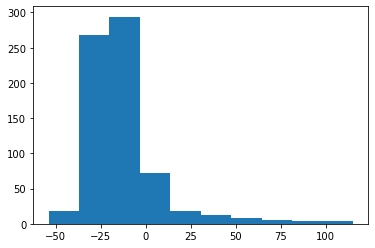

In [31]:
# Looking at the Target
plt.hist(data['A_Delay'])
plt.show()


In [32]:
# Data Description post out-lier removal
pd.options.display.max_columns = None
data.describe()

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,Duration,A_Delay,C_Rating,C_Market Share,C_Load Factor,C_On Time Performance Rating,D_DewPointC,D_WindGustKmph,D_cloudcover,D_humidity,D_precipMM,D_pressure,D_tempC,D_visibility,D_winddirDegree,D_windspeedKmph,D_Time,A_DewPointC,A_WindGustKmph,A_cloudcover,A_humidity,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,day,month,polarity,subjectivity,tweet_volume
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,7.040000e+02,7.040000e+02,7.040000e+02,7.040000e+02,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.00000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,7.466932,8.020455,9.009375,7.863324,7.117045,9.044318,105.065341,-12.801136,7.900000e+00,3.970000e+01,9.090000e+01,8.740000e+01,16.875000,15.450284,33.170455,64.747159,0.145455,1009.411932,25.228693,10.044034,174.686080,11.406250,5.173295,15.775568,15.795455,30.521307,56.578125,0.233239,1009.579545,26.81108,9.867898,184.948864,11.754261,6.826705,15.346591,7.607955,-0.011108,0.356045,2.106534
std,0.375193,0.777406,0.208012,0.382755,0.618946,0.049711,22.553587,21.874989,4.888454e-14,4.692916e-13,1.009688e-12,9.954671e-13,6.129123,8.623817,30.029231,20.737161,0.496281,5.998878,5.677710,1.918553,88.980088,5.992149,0.891606,7.121036,12.175141,31.015384,22.092644,0.776671,5.933192,6.14267,1.846420,96.878230,7.380772,0.959239,8.680797,3.680288,0.187922,0.165095,1.175261
min,7.000000,6.200000,8.700000,7.290000,6.200000,9.000000,0.000000,-54.000000,7.900000e+00,3.970000e+01,9.090000e+01,8.740000e+01,-2.000000,2.000000,0.000000,8.000000,0.000000,991.000000,13.000000,3.000000,4.000000,1.000000,3.000000,-3.000000,2.000000,0.000000,8.000000,0.000000,994.000000,15.00000,3.000000,2.000000,1.000000,6.000000,1.000000,1.000000,-1.000000,0.000000,1.000000
25%,7.000000,7.300000,8.700000,7.290000,6.200000,9.000000,84.000000,-25.000000,7.900000e+00,3.970000e+01,9.090000e+01,8.740000e+01,13.000000,9.000000,4.000000,53.000000,0.000000,1006.000000,21.000000,10.000000,94.000000,7.000000,5.000000,10.750000,8.000000,2.000000,39.000000,0.000000,1005.000000,23.00000,10.000000,106.000000,7.000000,6.000000,8.000000,5.000000,-0.088971,0.266667,1.000000
50%,7.500000,8.500000,9.100000,7.990000,7.300000,9.000000,108.000000,-18.000000,7.900000e+00,3.970000e+01,9.090000e+01,8.740000e+01,18.000000,14.000000,27.000000,69.000000,0.000000,1011.000000,25.000000,10.000000,174.000000,10.000000,5.000000,17.000000,12.000000,17.000000,59.000000,0.000000,1011.000000,28.00000,10.000000,187.000000,10.000000,6.000000,15.000000,8.000000,-0.013889,0.371875,2.000000
75%,7.990000,8.600000,9.200000,8.270000,7.800000,9.100000,117.250000,-8.000000,7.900000e+00,3.970000e+01,9.090000e+01,8.740000e+01,22.000000,19.000000,58.250000,81.000000,0.000000,1014.000000,29.000000,10.000000,247.000000,14.000000,6.000000,22.000000,19.000000,58.000000,77.000000,0.000000,1014.000000,31.00000,10.000000,274.000000,14.000000,8.000000,24.000000,11.000000,0.041071,0.451389,3.000000
max,7.990000,8.600000,9.200000,8.270000,7.800000,9.100000,199.000000,115.000000,7.900000e+00,3.970000e+01,9.090000e+01,8.740000e+01,27.000000,62.000000,100.000000,94.000000,7.500000,1021.000000,44.000000,20.000000,356.000000,41.000000,8.000000,27.000000,82.000000,100.000000,91.000000,7.600000,1022.000000,46.00000,20.000000,357.000000,42.000000,9.000000,31.000000,12.000000,0.700000,1.000000,6.000000


In [33]:
# Looking at the columns..
data.columns


Index(['D_Airport Rating', 'D_Airport On Time Rating',
       'D_Airport Service Rating', 'A_Airport Rating',
       'A_Airport On Time Rating', 'A_Airport Service Rating', 'Duration',
       'A_Delay', 'C_Rating', 'C_Market Share', 'C_Load Factor',
       'C_On Time Performance Rating', 'D_DewPointC', 'D_WindGustKmph',
       'D_cloudcover', 'D_humidity', 'D_precipMM', 'D_pressure', 'D_tempC',
       'D_visibility', 'D_winddirDegree', 'D_windspeedKmph', 'D_Time',
       'A_DewPointC', 'A_WindGustKmph', 'A_cloudcover', 'A_humidity',
       'A_precipMM', 'A_pressure', 'A_tempC', 'A_visibility',
       'A_winddirDegree', 'A_windspeedKmph', 'A_Time', 'day', 'month',
       'polarity', 'subjectivity', 'tweet_volume'],
      dtype='object')

In [35]:
# AVERAGE DELAYS OF AIRLINES
#print(abs(data[data['Air Asia'] == 1]['A_Delay']).sum()/1873)
#print(abs(data[data['Air India'] == 1]['A_Delay']).sum()/3529)
#print(abs(data[data['Indigo'] == 1]['A_Delay']).sum()/2296)
#print(abs(data[data['Vistara'] == 1]['A_Delay']).sum()/2825)
#print(abs(data[data['Spicejet'] == 1]['A_Delay']).sum()/1723)
#print(abs(data[data['Go Air'] == 1]['A_Delay']).sum()/2487)

In [36]:
# WE MAKE 4 POSSIBLE SETS OF DATA
# 1 - NO CHANGE IN FEATURES, NO CHANGE IN TARGET 
# 2 - POLYNOMIAL FEATURES OF DEGREE 2, NO CHANGE IN TARGET
# 3 - NO CHANGE IN FEATURES, TARGET NORMALIZED
# 4 - POLYNOMIAL FEATURES OF DEGREE 2, TARGET NORMALIZED

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
PT = PowerTransformer(method = "yeo-johnson")
X_train,X_test,y_train,y_test = tts(data.drop('A_Delay', axis = 1),data['A_Delay'],test_size = 0.3,random_state = 1)

PT.fit(y_train.to_numpy().reshape(-1,1))
lamb = PT.lambdas_

yt_train = PT.transform(y_train.to_numpy().reshape(-1,1))
yt_test = PT.transform(y_test.to_numpy().reshape(-1,1))

from sklearn.preprocessing import PolynomialFeatures
PF = PolynomialFeatures(2);

data_p = PF.fit_transform(data.drop('A_Delay',axis = 1))

Xp_train,Xp_test,y_train,y_test = tts(data_p,data['A_Delay'],test_size = 0.3,random_state = 1)

In [37]:
# Printing all shapes to be sure!
print(X_train.shape) # NO CHANGE APPLIED
print(X_test.shape)  # NO CHANGE APPLIED
print(y_train.shape) # NO CHANGE APPLIED
print(y_test.shape)  # NO CHANGE APPLIED
print(Xp_train.shape)# POLYNOMIAL FEATURES
print(Xp_test.shape) # POLYNOMIAL FEATURES
print(yt_train.shape)# TARGET NORMALIZED
print(yt_test.shape) # TARGET NORMALIZED


(492, 38)
(212, 38)
(492,)
(212,)
(492, 780)
(212, 780)
(492, 1)
(212, 1)


In [38]:
# Applying random forest regression on the data.
# Evaluation Metric used is mse.

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# NO CHANGE DATA
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(X_train,y_train)
print(mean_squared_error(RFR.predict(X_train),y_train))
print(mean_squared_error(RFR.predict(X_test),y_test))

# TARGET NORMALIZED
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(X_train,yt_train)
print(mean_squared_error(RFR.predict(X_train),yt_train))
print(mean_squared_error(RFR.predict(X_test),yt_test))

# POLYNOMIAL FEATURES AND NO NORMALIZATION OF TARGET
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xp_train,y_train)
print(mean_squared_error(RFR.predict(Xp_train),y_train))
print(mean_squared_error(RFR.predict(Xp_test),y_test))

# BOTH POLYNOMIAL AND NORMALIZATION APPLIED
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xp_train,yt_train)
print(mean_squared_error(RFR.predict(Xp_train),yt_train))
print(mean_squared_error(RFR.predict(Xp_test),yt_test))


41.85790458038941
64.07780219289165


<ipython-input-38-0a4d5500b4bc>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(X_train,yt_train)


0.07747261805221178
0.2607604463047761
24.95123735919385
65.97013053037081


<ipython-input-38-0a4d5500b4bc>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(Xp_train,yt_train)


0.05149674103660782
0.27387612542878187


In [39]:
# SELECTING BEST 60 FEATURES BY SelecKBest

from sklearn.feature_selection import SelectKBest ,mutual_info_regression
SKB = SelectKBest(mutual_info_regression,60)

SKB.fit(Xp_train,y_train)
Xp60_train = SKB.transform(Xp_train)
Xp60_test = SKB.transform(Xp_test)

SKB.fit(Xp_train,yt_train)
Xpt60_train = SKB.transform(Xp_train)
Xpt60_test = SKB.transform(Xp_test)

print(Xp60_train.shape)
print(Xp60_test.shape)
print(Xpt60_train.shape)
print(Xpt60_test.shape)

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass k=60 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(492, 60)
(212, 60)
(492, 60)
(212, 60)


In [40]:
print(Xp60_train.shape)
print(Xp60_test.shape)
(Xp60_train == Xpt60_train)

(492, 60)
(212, 60)


array([[ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False]])

In [41]:
# POLYNOMIAL REDUCED TO 60 FEATURES AND Y WITHOUT NORMALIZATION
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xp60_train,y_train)
print(mean_squared_error(RFR.predict(Xp60_train),y_train))
print(mean_squared_error(RFR.predict(Xp60_test),y_test))

# POLYNOMIAL REDUCED TO 60 FEATURES AND Y WITH NORMALIZATION
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xpt60_train,yt_train)
print(mean_squared_error(RFR.predict(Xpt60_train),yt_train))
print(mean_squared_error(RFR.predict(Xpt60_test),yt_test))

133.76224475028326
132.74536344696352


<ipython-input-41-385453eb382d>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(Xpt60_train,yt_train)


0.10874701446856166
0.30408572329796396


In [42]:
# TRYING SUPPORT VECTOR MACHINE ON THE DATA

from sklearn.svm import SVR
svr = SVR(kernel = 'poly',degree = 1, C = 1.0 , max_iter = 10000)

In [43]:
svr.fit(Xp60_train,yt_train)
print(mean_squared_error(svr.predict(Xp60_train),yt_train))
print(mean_squared_error(svr.predict(Xp60_test),yt_test))

0.9799136190043845
0.8152887023950038


C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [45]:
# WE TAKE THE PREDICTED VALUES FROM THE SVR AND USE IT AS A FEATURE IN RANDOM FOREST REGRESSION

X_train_svm = np.concatenate([Xp60_train,svr.predict(Xp60_train).reshape(-1,1)],axis = 1)
X_test_svm = np.concatenate([Xp60_test,svr.predict(Xp60_test).reshape(-1,1)],axis = 1)

data_svm = np.concatenate([X_train_svm,X_test_svm],axis = 0)

In [46]:
# TRAINING RFR ON THE MODIFIED DATASET
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(X_train_svm,yt_train)
print(mean_squared_error(RFR.predict(X_train_svm),yt_train))
print(mean_squared_error(RFR.predict(X_test_svm),yt_test))

<ipython-input-46-ac552e861caf>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(X_train_svm,yt_train)


0.14572536164468444
0.3087182998913043


In [47]:
g1 = PT.inverse_transform(RFR.predict(X_test_svm).reshape(-1,1)).reshape(-1,)
g2 = PT.inverse_transform(yt_test.reshape(-1,1)).reshape(-1,)

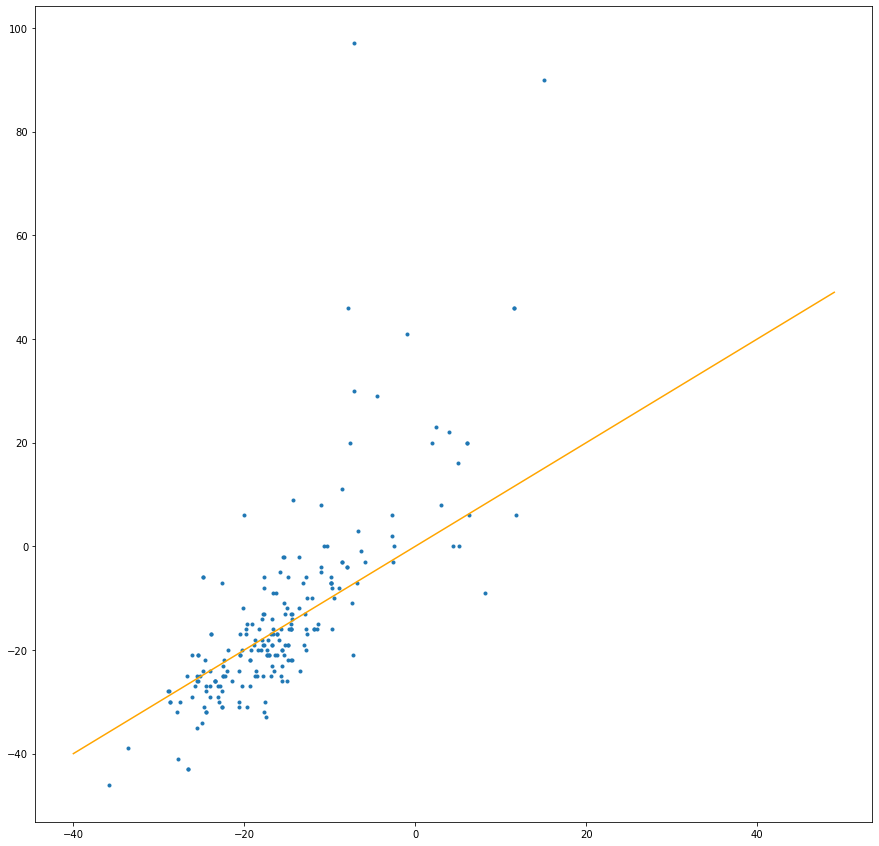

In [51]:
# LOOKING AT THE PREDICTIONS VISUALLY
# PREDICTED VS ACTUAL GRAPH
# y = x line (ORANGE)

plt.figure(figsize=(15,15))
plt.plot(np.arange(-40,50),np.arange(-40,50), color = 'orange')
plt.scatter(g1,g2, marker = '.')